# Artificial Neural Networks

We will make use of one of the first algorithmically described machine learning algorithms for classification, the ```perceptron``` and ```adaptive linear neurons```. We will start by implementing a perceptron step by step in Python and training it to classify different flower species in the Iris dataset.

__Outline:__

- Building an intuition for machine learning algorithms
- Using pandas, NumPy, and matplotlib to read in, process, and visualize data
- Implementing linear classification algorithms in Python

I won't deal with the theory behind of Artificial Neural Networks, perceptron, sigmoid neurons. 

In [15]:
import numpy as np

class perceptron(object):
    """Perceptron classifier."""
    def __init__(self, eta=0.01, n_iter=10):
        """Initialize the perceptron"""
        self.eta = eta # Learning Rate
        self.n_iter = n_iter # Number of Epochs / Iterations
        
    def fit(self, X, y):
        """Fit training data."""
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)


## Training the perceptron with iris data

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Get the iris data by using pandas 
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None) 

In [8]:
# Show the last of data
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


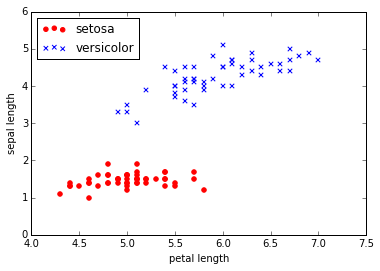

In [13]:
%matplotlib inline
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

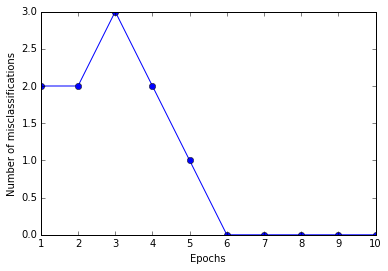

In [17]:
ppn = perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [18]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

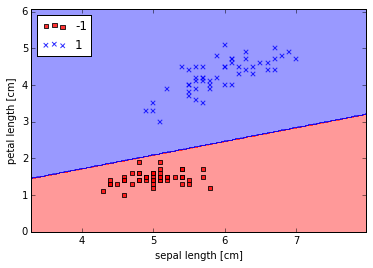

In [19]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

Adaptive Linear Neuron 
---

We will use the same class which was perceptron, and we will only change the fit function. We will change the weight by minimizing the cost function usign gradient descent

In [20]:
class Adaline(object):
    def __init__(self, eta = 0.01, n_iter = 50):
        """Initialize the adaptive linear neuron"""
        self.eta = eta # Learning Rate
        self.n_iter = n_iter # Learning Rate
    
    def fit(self, X, y):
        """ Fit the training data"""
        # Uses gradient descent algorithm 
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)
    

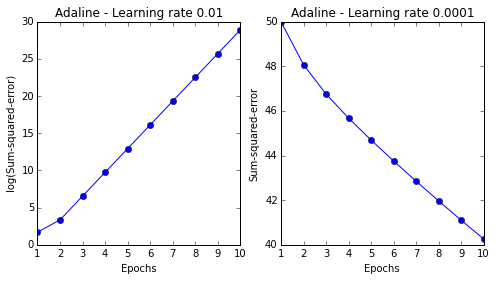

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
# Make an adaptive linear neuron with 0.01 learning rate
ada1 = Adaline(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1),np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

# Make another adaptive linear neuron with 100 times smaller learning rate
ada2 = Adaline(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1),ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
# Show the plot
plt.show()


Many algorithm of machine learning from scratch requires some sort of feature scaling for optimal performance. Gradient descent is one of the many algorithms that benefit from feature scaling. we will use a feature scaling method called standardization, which gives our data the property of a standard normal distribution.

> Standardization can easily be achieved using the NumPy methods ```mean``` and ```std```:

In [24]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

After standardization, we will train the ```Adaline``` again and see that it now converges using a learning rate  = 0.01

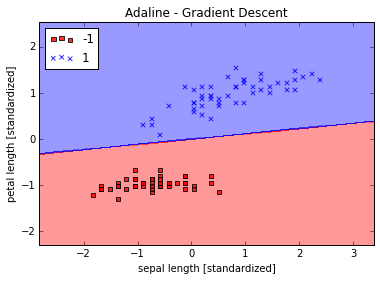

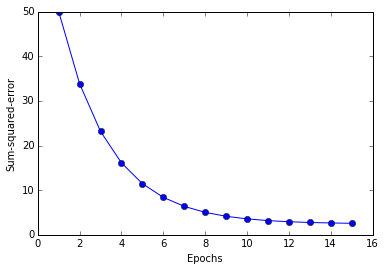

In [25]:
ada = Adaline(n_iter=15, eta=0.01)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

Stochastic Gradient Descent 
---

We minimized a cost function by taking a step into the opposite direction of a gradient that is calculated from the whole training set; this is why this approach is sometimes also referred to as ```batch gradient descent```. But the batch gradient descent algorithm will be quite costly when it comes to very large datasets, which is not uncommon in machine learning applications. It is very costly because we need to reevalute the whole training set each time we take one step towards the global minimum. 

There is another type of gradient descent algorithm called stochastic gradient descent which is approximation of batch gradient descent, broadly speaking.


To obtain accurate results via stochastic gradient descent, it is important to present it with data in a random order, which is why we want to shuffle the training set for every epoch to prevent cycles.

Let's modify the adeline class to make it use stochastic gradient descent method:

In [32]:
from numpy.random import seed
class AdalineSGD(object):
    def __init__(self, eta = 0.01, n_iter = 50, shuffle = True, random_state = None):
        """Initialize the adaptive linear neuron"""
        self.eta = eta # Learning Rate
        self.n_iter = n_iter # Learning Rate
        self.w_initialized = False # 
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
        
    def fit(self, X, y):
        """ Fit the training data"""
        # Uses gradient descent algorithm 
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
                cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
            
        return self
    
    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        
        else:
            self._update_weights(X, y)
        
        return self
    
    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to zeros"""
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)
    

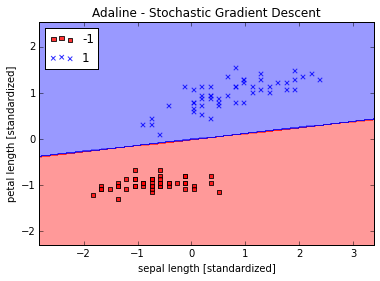

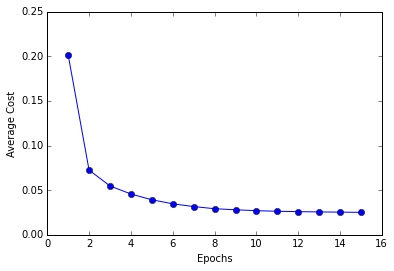

In [33]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()

See, the average cost goes down pretty quickly, and the final decision boundary after 15 epochs looks similar to the batch gradient descent with Adaline.